<a href="https://colab.research.google.com/github/PabloNatB/Projects/blob/main/Knn_recreation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
Pablo Natera Bravo
Practica 3 MachineLearning: Algoritmo KNN

"""
import sklearn.datasets as dt
import matplotlib.pyplot as plt
import numpy as np
import statistics as st

from matplotlib.colors import ListedColormap



In [2]:
#Geneamos nuestro dataset
X,y_true=dt.make_blobs(n_samples=250,n_features=2,cluster_std=0.5,random_state=(209))
#Seleccionamos nuestro training data
training_data=X[:200]
training_labels=y_true[:200]
#Seleccionamos el test data
test_data=X[200:]
test_labels=y_true[200:]



[]

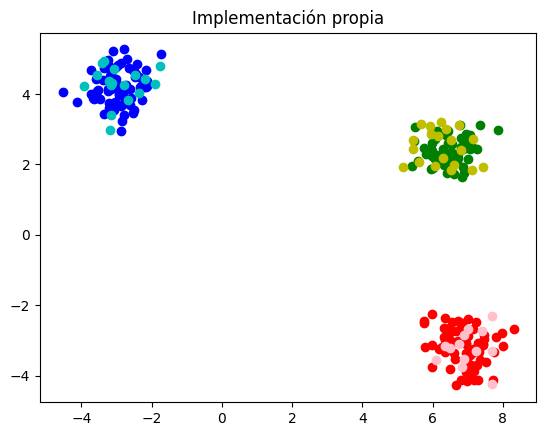

In [4]:
#Graficamos los puntos sigandole un color distinto a cada label
plt.figure()
for i in range (200):
    if (training_labels[i]==0):
        plt.scatter(training_data[i,0] , training_data[i,1], color="red")

    if (training_labels[i]==1):
        plt.scatter(training_data[i,0] , training_data[i,1], color="green")

    if(training_labels[i]==2):
        plt.scatter(training_data[i,0] , training_data[i,1], color="blue")

plt.plot()
#Definimos la distancia euclidiana entre dos puntos 2D.
def dist_euc(x,y):
    dist2=(x[0]-y[0])**2+(x[1]-y[1])**2
    return np.sqrt(dist2)
#Calculamos la matriz de distancias
distancias=np.zeros((50,200))
for i in range(200):
    for j in range(50):
        distancias[j,i]=dist_euc(training_data[i],test_data[j])
#asignamos las 5 labels de los puntos más cernanos
labels_5=np.zeros((50,5))
for i in range(50):
    for j in range(5):
        idx=np.argmin(distancias[i])
        labels_5[i,j]=training_labels[idx]
        distancias[i,idx]=100000000000000000000000000000
#Asignamos la label de mayor frecuencia a cada punto de testeo
y_pred=np.zeros(50)
for i in range(50):
    y_pred[i]=st.mode(labels_5[i])
#Graficamos con un color distinto para cada label
for i in range (50):
    if (y_pred[i]==0):
        plt.scatter(test_data[i,0] , test_data[i,1], color="pink")

    if (y_pred[i]==1):
        plt.scatter(test_data[i,0] , test_data[i,1], color="y")

    if(y_pred[i]==2):
        plt.scatter(test_data[i,0] , test_data[i,1], color="c")
plt.title("Implementación propia")
plt.plot()



In [5]:
#Hacemos el reporte para ver la precisión del código
from sklearn.metrics import classification_report
print("Reporte de implementación propia")
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(test_labels, y_pred, target_names=target_names))

#Implementación KNN de sklearn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(training_data, training_labels)
y_prediction = knn.predict(test_data)
#Hacemos el reporte de la implementacion de sklearn
target_names = ['class 0', 'class 1', 'class 2']
print("Reporte de implementación de sklearn")
print(classification_report(test_labels, y_prediction, target_names=target_names))


Reporte de implementación propia
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        13
     class 1       1.00      1.00      1.00        20
     class 2       1.00      1.00      1.00        17

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

Reporte de implementación de sklearn
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        13
     class 1       1.00      1.00      1.00        20
     class 2       1.00      1.00      1.00        17

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



[]

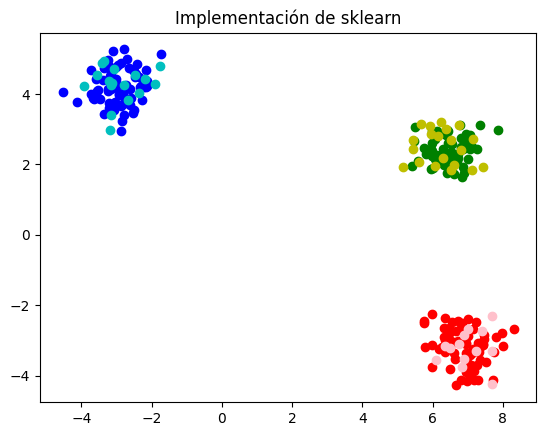

In [6]:
plt.figure()
for i in range (200):
    if (training_labels[i]==0):
        plt.scatter(training_data[i,0] , training_data[i,1], color="red")

    if (training_labels[i]==1):
        plt.scatter(training_data[i,0] , training_data[i,1], color="green")

    if(training_labels[i]==2):
        plt.scatter(training_data[i,0] , training_data[i,1], color="blue")
for i in range (50):
    if (y_prediction[i]==0):
        plt.scatter(test_data[i,0] , test_data[i,1], color="pink")

    if (y_prediction[i]==1):
        plt.scatter(test_data[i,0] , test_data[i,1], color="y")

    if(y_prediction[i]==2):
        plt.scatter(test_data[i,0] , test_data[i,1], color="c")



plt.title("Implementación de sklearn")
plt.plot()